In [6]:
import pandas as pd
import datetime
from pandas_datareader import data, wb
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 5, 6)

df = data.DataReader("ONGC.NS", 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-29,70.949997,68.699997,69.400002,70.500000,18023637.0,70.500000
2020-04-30,81.050003,71.500000,72.599998,79.900002,54290691.0,79.900002
2020-05-04,77.849998,74.050003,76.000000,76.550003,28640967.0,76.550003
2020-05-05,81.900002,78.150002,78.900002,78.449997,61865481.0,78.449997
2020-05-06,81.349998,77.449997,81.349998,79.250000,38932914.0,79.250000


In [7]:
df_Y = data.DataReader("WIPRO.NS", 'yahoo', start, end)
df_Y.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-29,182.449997,179.399994,180.100006,180.649994,5030291.0,180.649994
2020-04-30,192.600006,183.550003,185.000000,190.949997,8833927.0,190.949997
2020-05-04,191.300003,183.050003,184.500000,190.050003,8570370.0,190.050003
2020-05-05,194.000000,182.199997,191.449997,184.199997,6932389.0,184.199997
2020-05-06,188.000000,181.000000,185.699997,187.050003,5438558.0,187.050003


In [8]:
close_px = df_Y['Adj Close']
mavg = close_px.rolling(window=100).mean()


In [9]:
close_px

Date
2010-01-04    107.914261
2010-01-05    109.617630
2010-01-06    107.401352
2010-01-07    105.495438
2010-01-08    103.908943
2010-01-11    102.874756
2010-01-12    107.914261
2010-01-13    111.305069
2010-01-14    115.271004
2010-01-15    114.462189
2010-01-18    116.267143
2010-01-19    114.937119
2010-01-20    113.008423
2010-01-21    110.348320
2010-01-22    108.886238
2010-01-25    108.116844
2010-01-27    101.941498
2010-01-28    104.748840
2010-01-29    100.782883
2010-02-01    103.947639
2010-02-02    101.599327
2010-02-03    104.468872
2010-02-04    101.910393
2010-02-05    100.175941
2010-02-08     98.955124
2010-02-09    101.770065
2010-02-10    100.743484
2010-02-11    101.988510
2010-02-15    102.641106
2010-02-16    104.204773
                 ...    
2020-03-19    162.350006
2020-03-20    179.199997
2020-03-23    170.149994
2020-03-24    176.350006
2020-03-25    174.649994
2020-03-26    182.600006
2020-03-27    183.500000
2020-03-30    184.149994
2020-03-31    196.69

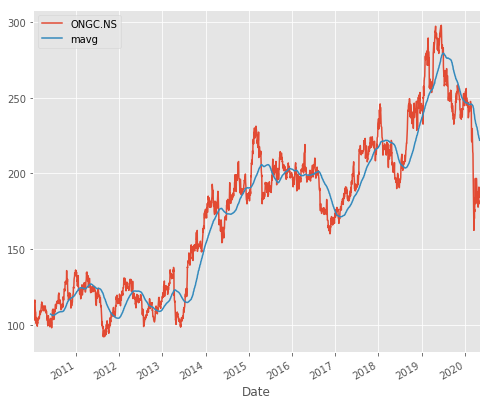

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='ONGC.NS')
mavg.plot(label='mavg')
plt.legend()

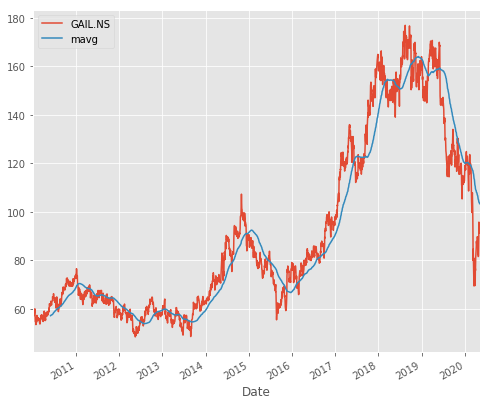

In [11]:
df_GAIL = data.DataReader("GAIL.NS", 'yahoo', start, end)
close_px_GAIL = df_GAIL['Adj Close']
mavg_GAIL = close_px_GAIL.rolling(window=100).mean()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px_GAIL.plot(label='GAIL.NS')
mavg_GAIL.plot(label='mavg')
plt.legend()

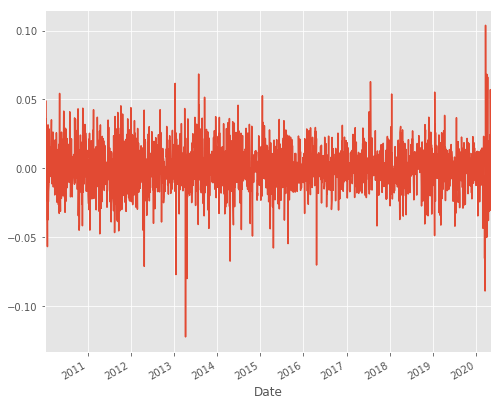

In [12]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

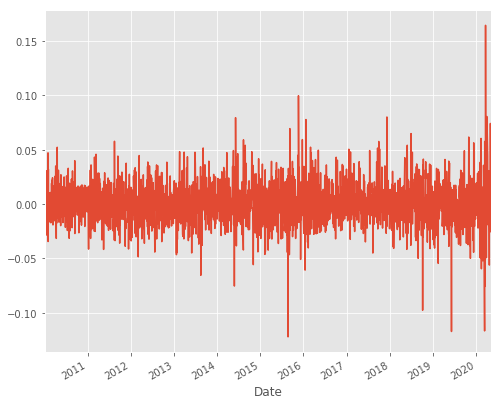

In [13]:
Rets_close_px_GAIL = close_px_GAIL / close_px_GAIL.shift(1) - 1
Rets_close_px_GAIL.plot(label='return')

In [14]:
dfcomp = data.DataReader(['ONGC.NS', 'IOC.NS', 'HINDPETRO.NS', 'BPCL.NS', 'GAIL.NS', 'RELIANCE.NS', 'ADANIGAS.NS'],
                        'yahoo',start=start,end=end)['Adj Close']







In [15]:
dfcomp.tail()

Symbols,ADANIGAS.NS,BPCL.NS,GAIL.NS,HINDPETRO.NS,IOC.NS,ONGC.NS,RELIANCE.NS
Date,,,,,,,
2020-04-29,105.849998,360.750000,89.099998,208.350006,80.500000,70.500000,1426.949951
2020-04-30,105.349998,370.000000,95.699997,220.300003,84.199997,79.900002,1466.000000
2020-05-04,99.800003,347.899994,93.500000,207.800003,79.750000,76.550003,1435.199951
2020-05-05,97.349998,347.049988,91.099998,214.600006,78.699997,78.449997,1460.650024
2020-05-06,99.699997,343.799988,94.699997,202.500000,76.550003,79.250000,1460.750000


In [16]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

In [17]:
corr

Symbols,ADANIGAS.NS,BPCL.NS,GAIL.NS,HINDPETRO.NS,IOC.NS,ONGC.NS,RELIANCE.NS
Symbols,,,,,,,
ADANIGAS.NS,1.000000,0.281965,0.255239,0.303140,0.253029,0.298329,0.244669
BPCL.NS,0.281965,1.000000,0.349585,0.733103,0.659393,0.400439,0.324544
GAIL.NS,0.255239,0.349585,1.000000,0.329790,0.333183,0.415062,0.337977
HINDPETRO.NS,0.303140,0.733103,0.329790,1.000000,0.677620,0.376231,0.311099
IOC.NS,0.253029,0.659393,0.333183,0.677620,1.000000,0.418088,0.299125
ONGC.NS,0.298329,0.400439,0.415062,0.376231,0.418088,1.000000,0.402637
RELIANCE.NS,0.244669,0.324544,0.337977,0.311099,0.299125,0.402637,1.000000


In [18]:
retscomp.tail()

Symbols,ADANIGAS.NS,BPCL.NS,GAIL.NS,HINDPETRO.NS,IOC.NS,ONGC.NS,RELIANCE.NS
Date,,,,,,,
2020-04-29,0.016811,0.004595,0.053814,-0.012091,0.010672,0.018786,-0.000840
2020-04-30,-0.004724,0.025641,0.074074,0.057355,0.045963,0.133333,0.027366
2020-05-04,-0.052681,-0.059730,-0.022988,-0.056741,-0.052850,-0.041927,-0.021010
2020-05-05,-0.024549,-0.002443,-0.025668,0.032724,-0.013166,0.024820,0.017733
2020-05-06,0.024140,-0.009365,0.039517,-0.056384,-0.027319,0.010198,0.000068


Text(0,0.5,'Returns GAIL.NS')

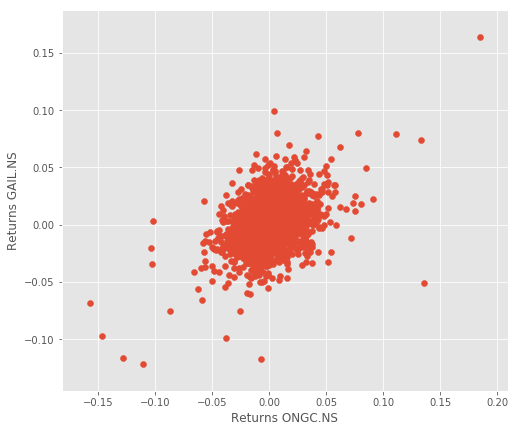

In [19]:
plt.scatter(retscomp['ONGC.NS'], retscomp['GAIL.NS'])
plt.xlabel('Returns ONGC.NS')
plt.ylabel('Returns GAIL.NS')

In [22]:
# pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

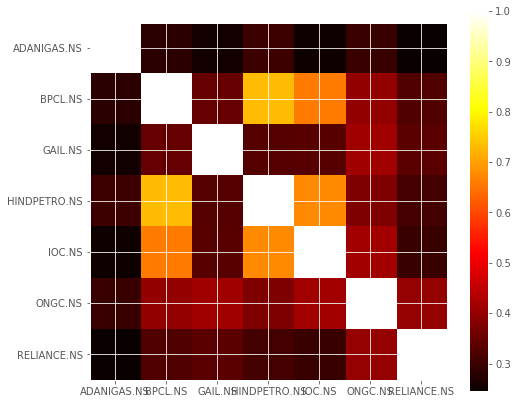

In [23]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

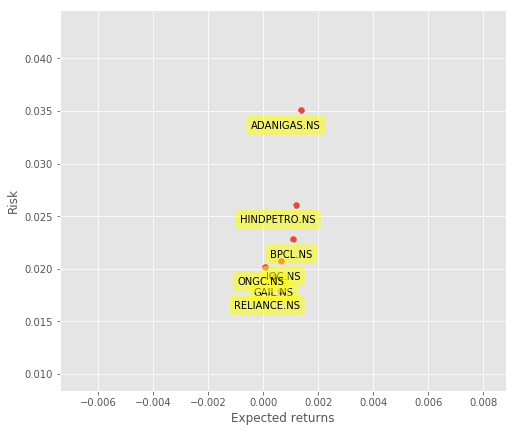

In [24]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))